In [1]:
import pandas as pd
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

# importation des données
df = pd.read_csv('decathlon2.dat',index_col=0, delimiter=' ') #
print(df)
df.head()
df.dtypes
df.shape


              c100  long  poids  haut   c400   c110   disq  perche  javel  \
SEBRLE       11.04  7.58  14.83  2.07  49.81  14.69  43.75    5.02  63.19   
CLAY         10.76  7.40  14.26  1.86  49.37  14.05  50.72    4.92  60.15   
KARPOV       11.02  7.30  14.77  2.04  48.37  14.09  48.95    4.92  50.31   
BERNARD      11.02  7.23  14.25  1.92  48.93  14.99  40.87    5.32  62.77   
YURKOV       11.34  7.09  15.19  2.10  50.42  15.31  46.26    4.72  63.44   
WARNERS      11.11  7.60  14.31  1.98  48.68  14.23  41.10    4.92  51.77   
ZSIVOCZKY    11.13  7.30  13.48  2.01  48.62  14.17  45.67    4.42  55.37   
McMULLEN     10.83  7.31  13.76  2.13  49.91  14.38  44.41    4.42  56.37   
MARTINEAU    11.64  6.81  14.57  1.95  50.14  14.93  47.60    4.92  52.33   
HERNU        11.37  7.56  14.41  1.86  51.10  15.06  44.99    4.82  57.19   
BARRAS       11.33  6.97  14.09  1.95  49.48  14.48  42.10    4.72  55.40   
NOOL         11.33  7.27  12.68  1.98  49.20  15.29  37.92    4.62  57.44   

(41, 13)

SEBRLE         14.69
CLAY           14.05
KARPOV         14.09
BERNARD        14.99
YURKOV         15.31
WARNERS        14.23
ZSIVOCZKY      14.17
McMULLEN       14.38
MARTINEAU      14.93
HERNU          15.06
BARRAS         14.48
NOOL           15.29
BOURGUIGNON    15.67
Sebrle         14.05
Clay           14.13
Karpov         13.97
Macey          14.56
Warners        14.01
Zsivoczky      14.95
Hernu          14.25
Nool           14.80
Bernard        14.17
Schwarzl       14.25
Pogorelov      14.21
Schoenbeck     14.34
Barras         14.37
Smith          14.01
Averyanov      14.39
Ojaniemi       15.01
Smirnov        14.77
Qi             14.78
Drews          14.01
Parkhomenko    14.88
Terek          15.12
Gomez          14.41
Turi           14.26
Lorenzo        15.38
Karlivans      14.98
Korkizoglou    14.96
Uldal          15.09
Casarsa        15.39
Name: c110, dtype: float64
SEBRLE         11.04
CLAY           10.76
KARPOV         11.02
BERNARD        11.02
YURKOV         11.34
WARNERS

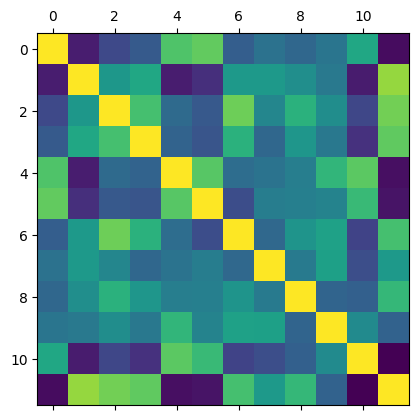

In [2]:
# Afficher une colonne de plusieurs facons
print(df.c110)
print(df[df.columns[0]])
print(df.iloc[:, 1])

# Calcul des correlations des variables quanti
X = df
X = X.drop(['COMPET'],axis=1)
print(X.corr())
# Sous forme de graphique
plt.matshow(np.corrcoef(X, rowvar = False))
plt.show()


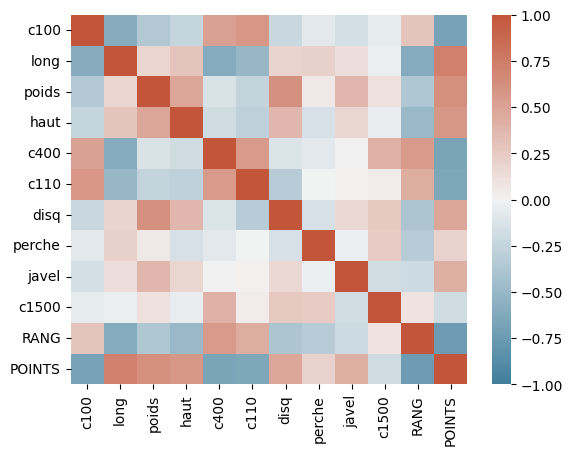

              c100  long  poids  haut   c400   c110   disq  perche  javel  \
SEBRLE       11.04  7.58  14.83  2.07  49.81  14.69  43.75    5.02  63.19   
CLAY         10.76  7.40  14.26  1.86  49.37  14.05  50.72    4.92  60.15   
KARPOV       11.02  7.30  14.77  2.04  48.37  14.09  48.95    4.92  50.31   
BERNARD      11.02  7.23  14.25  1.92  48.93  14.99  40.87    5.32  62.77   
YURKOV       11.34  7.09  15.19  2.10  50.42  15.31  46.26    4.72  63.44   
WARNERS      11.11  7.60  14.31  1.98  48.68  14.23  41.10    4.92  51.77   
ZSIVOCZKY    11.13  7.30  13.48  2.01  48.62  14.17  45.67    4.42  55.37   
McMULLEN     10.83  7.31  13.76  2.13  49.91  14.38  44.41    4.42  56.37   
MARTINEAU    11.64  6.81  14.57  1.95  50.14  14.93  47.60    4.92  52.33   
HERNU        11.37  7.56  14.41  1.86  51.10  15.06  44.99    4.82  57.19   
BARRAS       11.33  6.97  14.09  1.95  49.48  14.48  42.10    4.72  55.40   
NOOL         11.33  7.27  12.68  1.98  49.20  15.29  37.92    4.62  57.44   

In [3]:
# On utilise cette palette pour avoir des couleurs
# faciles a lire pour la correlation
import seaborn as sns
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# On utilise vmin et vmax pour imposer aux couleurs d'etre 
# entre -1 and +1
sns.heatmap(X.corr(),cmap=cmap,vmin=-1,vmax=1)
plt.show()

# Pour l'ACP, on enleve les variables RANG et POINTS
X = X.drop(['RANG','POINTS'],axis=1)
X.shape
print(X)


[3.35370318 1.7805593  1.4400396  1.08327161 0.70189287 0.6142504
 0.46251615 0.4067985  0.22018522 0.18678317]


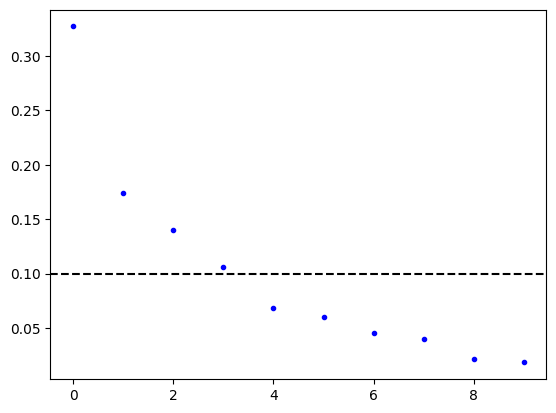

In [4]:
# Centrer et reduire X avant de faire l'ACP
from sklearn.preprocessing import StandardScaler
X_sd = StandardScaler().fit_transform(X)

# la moyenne est nulle, l'ecart type vaut 1
X_sd.std(axis=0)
X_sd.mean(axis=0)

# L'ACP
pca = PCA()
pca.fit(X_sd)

# Calcul des valeurs propres
print(pca.explained_variance_)

# Part de variance expliquee
pca.explained_variance_ / pca.explained_variance_.sum()
(pca.explained_variance_ / pca.explained_variance_.sum()).cumsum()

plt.plot(pca.explained_variance_  / pca.explained_variance_.sum(),'b.')
plt.axhline(1 / X_sd.shape[1], color='k', linestyle='--')
plt.show()


In [5]:
# Calcul du cercle des correlations
PC = pca.components_.T*np.sqrt(pca.explained_variance_)
PC
# Pour afficher les valeurs des correlations entre les variables et les axes
# En ligne les variables et en colonne les axes.
pd.DataFrame(PC,index=X.columns)


,0,1,2,3,4,5,6,7,8,9
c100,-0.784344,0.189467,-0.186698,-0.038288,-0.305951,0.232048,-0.259640,-0.294413,0.049156,0.183368
long,0.751116,-0.349712,0.184475,0.103050,-0.037134,-0.239923,-0.426885,0.013401,0.226487,0.035026
poids,0.630236,0.605736,-0.023669,0.192959,-0.112532,0.239412,0.210640,0.200227,0.200501,0.168675
haut,0.579050,0.354645,-0.262736,-0.137279,-0.562340,-0.366612,0.062194,-0.079784,-0.114335,-0.045996
c400,-0.688053,0.576512,0.133103,0.029666,0.088781,-0.260611,0.084617,-0.136107,0.259081,-0.178922
c110,-0.755516,0.231636,-0.093788,0.294444,-0.166362,-0.078090,-0.243015,0.453554,-0.070449,-0.039270
disq,0.559330,0.613846,0.043486,-0.262897,0.106129,0.352192,-0.292362,-0.024485,-0.072642,-0.194122
perche,0.050967,-0.182597,0.700350,0.558386,-0.334058,0.205077,0.066621,-0.113554,-0.038936,-0.119478
javel,0.280553,0.320927,-0.394496,0.721126,0.308919,-0.127909,-0.072596,-0.188882,-0.116055,0.037934
c1500,-0.058799,0.480115,0.791859,-0.163090,0.155470,-0.233766,-0.056875,-0.008749,-0.144401,0.185507


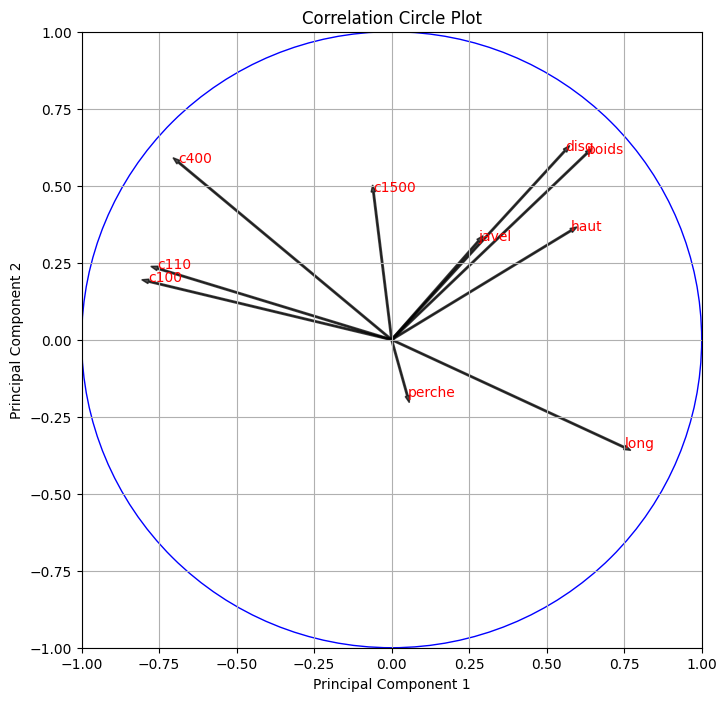

In [6]:
# Cercle des correlations entre le premier et deuxieme axe
plt.figure(figsize=(8, 8))
plt.title('Correlation Circle Plot')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

for i in range(0,X.shape[1]):
    plt.arrow(0, 0,PC[i, 0],PC[i, 1],color='black',alpha=0.7,width=0.005)

feature = X.columns
for i in range(0,X.shape[1]):
    plt.annotate(feature[i], (PC[i, 0],PC[i, 1]),color='red')

plt.xlim(-1,1)
plt.ylim(-1,1)
plt.grid(True)
plt.gca().add_artist(plt.Circle((0,0),1,color='blue',fill=False))
plt.show()
# Premier axe : c110 (cor=0.76), c100 (cor=0.78) et c400 (cor=0.69) sont très corrélés (positivement),
# long (cor=-0.75), haut (cor=-0.58), poids (cor=-0.63) et disq (cor=-0.56)  sont très corrélés négativement
# c1500 (cor=0.06), et perch (cor=-0.05), ne sont quasiment pas corrélés au premier axe

# Deuxième axe : disq (cor=0.61), poids (cor=0.61) et c400 (cor=0.58) sont très corrélés (positivement),
# c1500 (cor=0.48), haut (cor=0.35) et javel (cor=0.32) sont moyennement corrélés au deuxième axe
# long (cor=-0.35) est moyennement corrélé (négativement) au deuxième axe


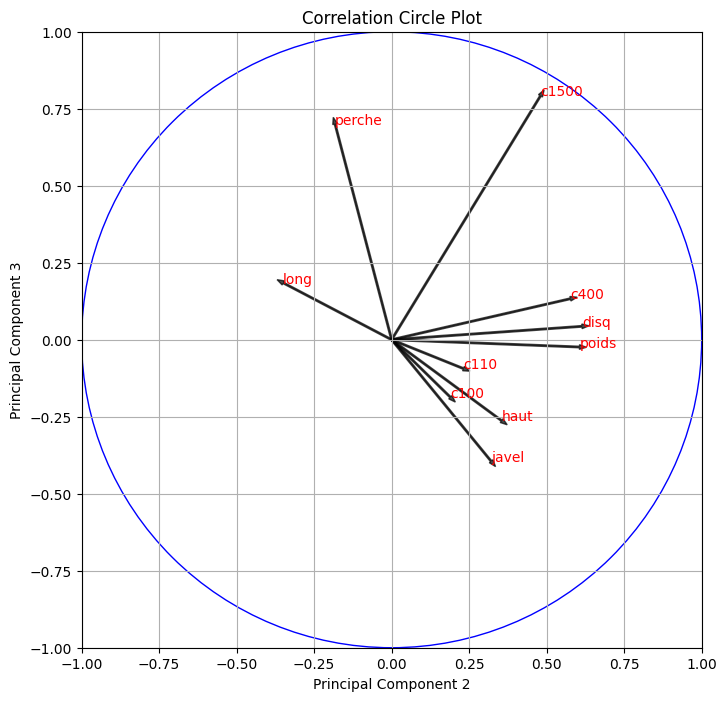

In [7]:
# Cercle des correlations entre le deuxieme et troisieme axe
plt.figure(figsize=(8, 8))
plt.title('Correlation Circle Plot')
plt.xlabel('Principal Component 2')
plt.ylabel('Principal Component 3')

for i in range(0,X.shape[1]):
    plt.arrow(0, 0,PC[i, 1],PC[i, 2],color='black',alpha=0.7,width=0.005)

feature = X.columns
for i in range(0,X.shape[1]):
    plt.annotate(feature[i], (PC[i, 1],PC[i, 2]),color='red')


plt.xlim(-1,1)
plt.ylim(-1,1)
plt.grid(True)
plt.gca().add_artist(plt.Circle((0,0),1,color='blue',fill=False))
plt.show()
# Troisième axe : C1500 (cor=0.79), perche (cor=0.70) sont très corrélés (positivement),
# javel (cor=-0.39), haut (cor=-0.26) sont moyennement corrélés (négativement)


In [8]:
# Contribution des individus aux axes
# La matrice des facteurs s'obtient directement avec la commande suivante

F = pca.transform(X_sd) #pca.transform centre automatiquement les données avant d'appliquer la PCA.
F.shape
pd.DataFrame(F,index=df.index)

# On peut egalement la recalculer en passant par la matrice U
U = pca.components_
# sous Python U est la matrice transposée des
# composantes principales
# U contient les vecteurs des nouvelles coordonnées en ligne
# (au lieu de les avoir en colonne)
# Prendre la transposée pour avoir U dans le "bon sens" (comme dans le cours)
np.matmul(X_sd,U.transpose())
# On retrouve F

# Les contributions des individus aux axes (formule du cours)
Contrib_ind = (F**2)/(pca.explained_variance_*41)
pd.DataFrame(Contrib_ind*100,index=df.index)

# sur l'axe 1, Drews (4.48%), Yurkov (3.86%) et Casarsa (3.47%) sont ceux qui contribuent le plus
# sur l'axe 2, Karpov (14.41%) Bourguignon (11.92%), Sebrle (11.00%) et Smith (7.37%) sont ceux qui contribuent le plus
# sur l'axe 3, Korkizoglou (7.52%) MARTINEAU (6.66%) et Casarsa (6.29%) sont ceux qui contribuent le plus


,0,1,2,3,4,5,6,7,8,9
SEBRLE,0.455757,0.815562,1.157940e+00,3.106555,1.737719,4.217626,1.604044,1.137950,0.209607,3.274625
CLAY,1.109223,0.452228,7.765604e+00,0.283502,13.548493,1.891155,2.643163,2.183106,4.669217,0.924764
KARPOV,1.341617,0.320913,6.481775e+00,7.760326,2.197425,2.131983,0.190247,0.375619,7.100963,3.575429
BERNARD,0.270185,1.047869,1.341417e+00,11.102590,0.454453,0.301595,0.012979,0.027284,5.794849,0.463782
YURKOV,0.249712,6.220251,2.542290e+00,1.718238,5.441470,0.043449,1.737002,0.053660,0.452961,0.041600
WARNERS,0.092632,3.888993,9.952364e-01,0.781913,3.486481,0.004157,0.049199,0.541212,4.087621,6.793474
ZSIVOCZKY,0.053717,1.638763,2.787004e+00,5.920349,0.006750,0.136443,1.554871,3.275749,1.391384,0.278571
McMULLEN,0.251033,0.072923,2.954141e-01,5.230959,0.219831,12.410170,0.058087,0.397504,3.207585,1.418996
MARTINEAU,2.895568,0.431101,9.024515e-01,0.661887,8.655194,22.150592,0.582596,1.204007,1.764453,4.460921
HERNU,1.738415,0.326724,1.197326e+00,0.246971,0.191870,0.196573,12.938465,0.027170,19.385786,0.660840


In [9]:
# Qualité de représentation des individus au premier axe
deno = np.sum(X_sd**2,axis=1)
num=(np.matmul(X_sd,U[0,:])**2)
num/deno

quali = np.zeros((41,3))
# Qualité de représentation des individus au trois premiers axes
for j in range(0,3):
    num=(np.matmul(X_sd,U[j,:])**2)
    quali[:,j]=num/deno

print(quali)
pd.DataFrame(quali,index=df.index)*100
pd.DataFrame(quali.cumsum(axis=1),index=df.index)*100
# Warners est très bien représenté dans le plan factoriel (composé des trois axes), a 97.80%
# BOURGUIGNON egalement, a 95.42%, Casarsa a 93.28% et Drews a 91.10%.
# McMULLEN est tres mal represente par les trois axes (8.73%) !!


[[1.11678883e-01 1.06102622e-01 1.21835343e-01]
 [1.24009414e-01 2.68426547e-02 3.72787121e-01]
 [1.59918860e-01 2.03091109e-02 3.31753059e-01]
 [4.86777757e-02 1.00232622e-01 1.03772890e-01]
 [3.76996015e-02 4.98582120e-01 1.64805540e-01]
 [2.16080518e-02 4.81643239e-01 9.96856250e-02]
 [1.12428873e-02 1.82102535e-01 2.50469798e-01]
 [5.26154822e-02 8.11487208e-03 2.65866401e-02]
 [2.84300717e-01 2.24726992e-02 3.80467810e-02]
 [3.06104050e-01 3.05441635e-02 9.05269586e-02]
 [4.72468751e-01 2.53726965e-02 3.56110549e-08]
 [3.94346393e-01 2.77290231e-01 1.28093714e-01]
 [8.56841588e-01 2.16170343e-03 9.52244066e-02]
 [6.95410207e-01 7.95431444e-02 3.58490518e-03]
 [7.11205187e-01 3.24320410e-02 2.47426606e-03]
 [8.51755296e-01 6.38336469e-05 6.90118013e-05]
 [4.23048639e-01 9.20395000e-02 2.94777422e-01]
 [5.29943708e-01 3.66471567e-01 8.16261239e-02]
 [1.29997942e-01 2.07443180e-01 3.31567758e-01]
 [2.37513279e-01 1.14926920e-01 2.42485454e-01]
 [9.08564505e-03 2.48894782e-01 1.913628

,0,1,2
SEBRLE,11.167888,21.778151,33.961685
CLAY,12.400941,15.085207,52.363919
KARPOV,15.991886,18.022797,51.198103
BERNARD,4.867778,14.891040,25.268329
YURKOV,3.769960,53.628172,70.108726
WARNERS,2.160805,50.325129,60.293692
ZSIVOCZKY,1.124289,19.334542,44.381522
McMULLEN,5.261548,6.073035,8.731699
MARTINEAU,28.430072,30.677342,34.482020
HERNU,30.610405,33.664821,42.717517


#################################################################
# Representation des individus dans les plans factoriels
# On affiche les individus qui contribuent le plus sur chaque axe


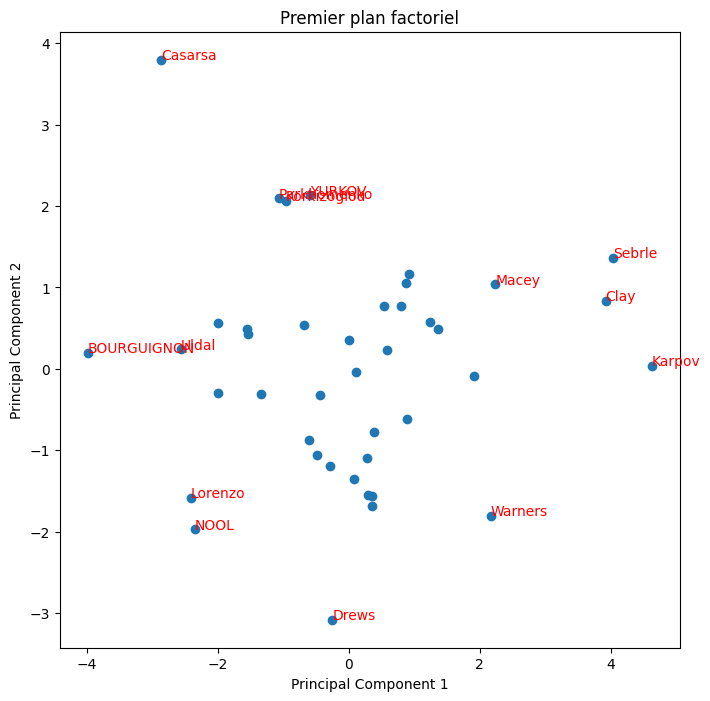

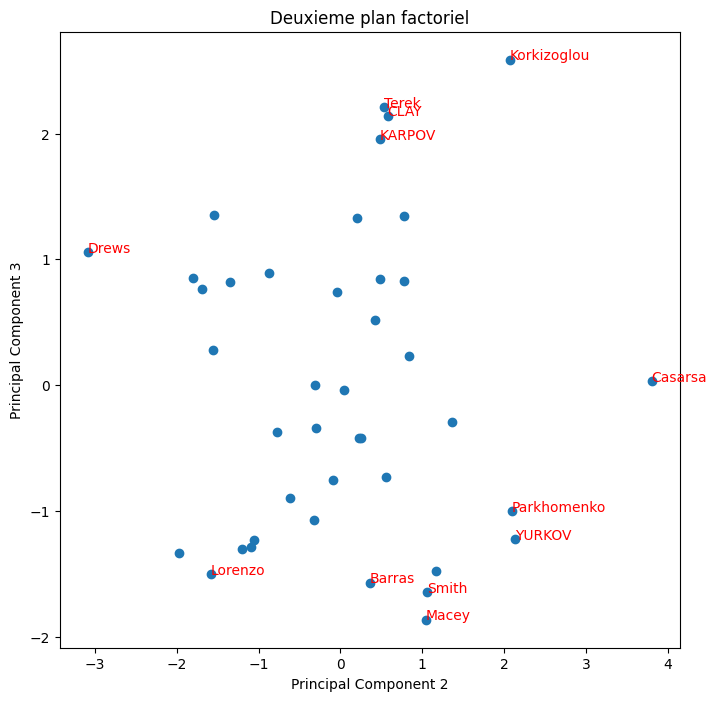

In [10]:
# Premier plan factoriel

plt.figure(figsize=(8, 8))
plt.scatter(F[:,0],F[:,1])
for i in range(0,X.shape[0]):
    # annotation uniquement si valeur absolue sur une de 2 dimensions importantes (valeurs choisies empiriquement)
    if (abs(F[i,0]) > 2) | (abs(F[i,1]) > 2):
        plt.annotate(df.index[i],(F[i,0],F[i,1]), color="red")
plt.title('Premier plan factoriel')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()
# On retrouve Drews, Yurkov, Casarsa sur le premier axe et Karpov, Bourguignon,
# Sebrle et Smith sur le deuxième axe (voir resultats sur les contributions des
# individus aux axes).

# Deuxième plan factoriel

plt.figure(figsize=(8, 8))
plt.scatter(F[:,1],F[:,2])
for i in range(0,X.shape[0]):
    # annotation uniquement si valeur absolue sur une de 2 dimensions importantes (valeurs choisies empiriquement)
    if (abs(F[i,1]) > 2) | (abs(F[i,2]) > 1.5):
        plt.annotate(df.index[i],(F[i,1],F[i,2]), color="red")
plt.title('Deuxieme plan factoriel')
plt.xlabel('Principal Component 2')
plt.ylabel('Principal Component 3')
plt.show()
# On retrouve Korkizoglou, MARTINEAU et Casarsa sur le troisièle axes (voir resultats sur les contributions des
# individus aux axes).


##########################################################
# Si on multiplie maintenant les donnees de courses par -1


              c100   c400   c110   c1500
SEBRLE       11.04  49.81  14.69  291.70
CLAY         10.76  49.37  14.05  301.50
KARPOV       11.02  48.37  14.09  300.20
BERNARD      11.02  48.93  14.99  280.10
YURKOV       11.34  50.42  15.31  276.40
WARNERS      11.11  48.68  14.23  278.10
ZSIVOCZKY    11.13  48.62  14.17  268.00
McMULLEN     10.83  49.91  14.38  285.10
MARTINEAU    11.64  50.14  14.93  262.10
HERNU        11.37  51.10  15.06  285.10
BARRAS       11.33  49.48  14.48  282.00
NOOL         11.33  49.20  15.29  266.60
BOURGUIGNON  11.36  51.16  15.67  291.70
Sebrle       10.85  48.36  14.05  280.01
Clay         10.44  49.19  14.13  282.00
Karpov       10.50  46.81  13.97  278.11
Macey        10.89  48.97  14.56  265.42
Warners      10.62  47.97  14.01  278.05
Zsivoczky    10.91  49.40  14.95  269.54
Hernu        10.97  48.73  14.25  264.35
Nool         10.80  48.81  14.80  276.33
Bernard      10.69  49.13  14.17  276.31
Schwarzl     10.98  49.76  14.25  273.56
Pogorelov    10.

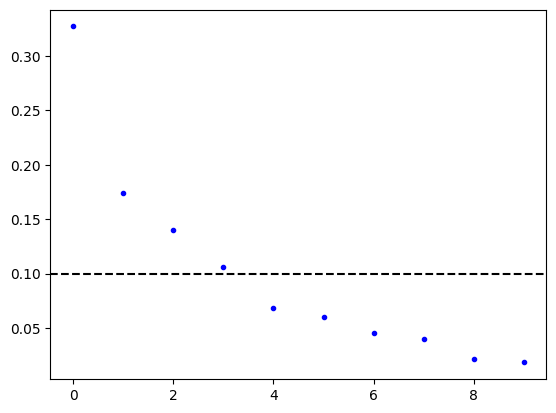

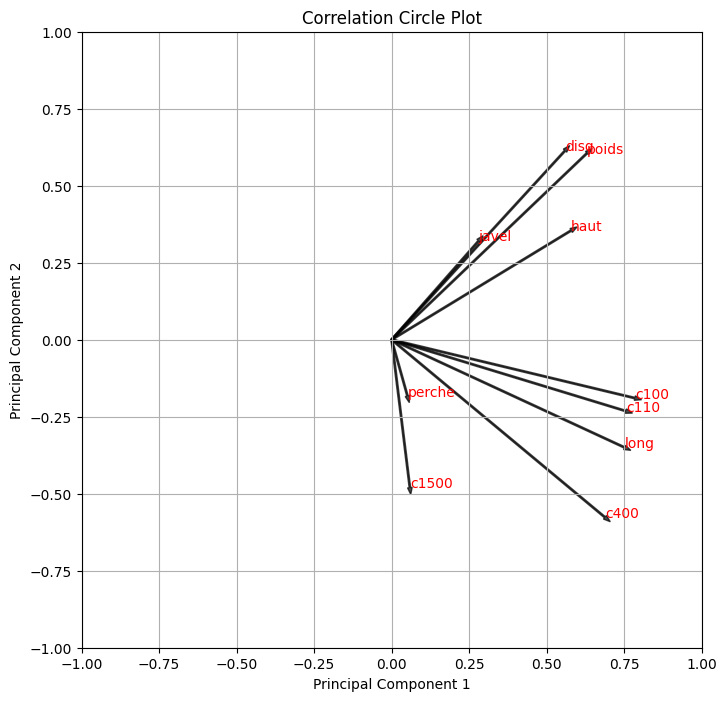

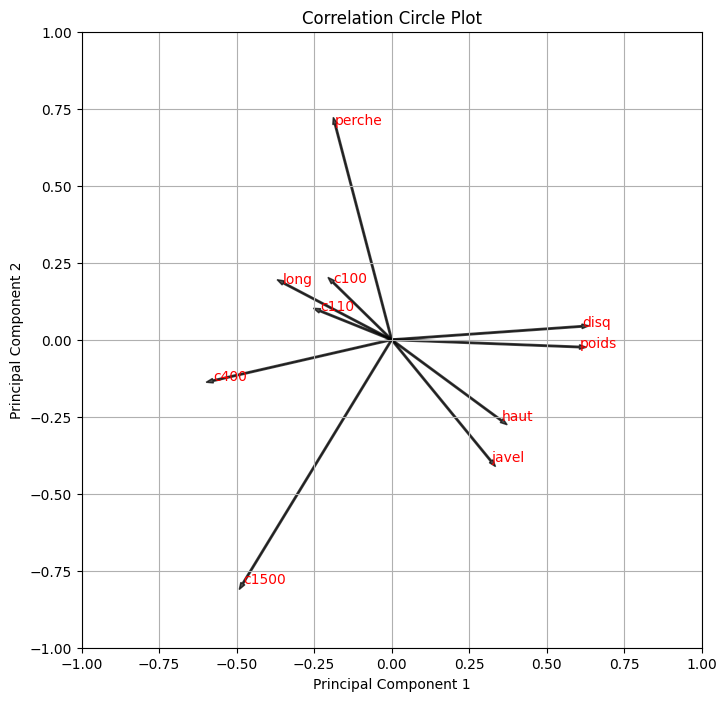

In [11]:
print(df.iloc[:,[0,4,5,9]])
df.iloc[:,[0,4,5,9]] = (df.iloc[:,[0,4,5,9]])*(-1)
print(df)

X2=df
X2 = X2.drop(['COMPET','RANG','POINTS'],axis=1)
X2.shape
print(X2)

# On centre et on reduit
X2_sd = StandardScaler().fit_transform(X2)

# L'ACP
pca = PCA()
pca.fit(X2_sd)

# Calcul des valeurs propres
print(pca.explained_variance_)

# Part de variance expliquee
pca.explained_variance_ / pca.explained_variance_.sum()

plt.plot(pca.explained_variance_  / pca.explained_variance_.sum(),'b.')
plt.axhline(1 / X2_sd.shape[1], color='k', linestyle='--')
plt.show()

PC = pca.components_.T*np.sqrt(pca.explained_variance_)
# Cercle des correlations entre le premier et deuxieme axe
plt.figure(figsize=(8, 8))
plt.title('Correlation Circle Plot')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

for i in range(0,X2.shape[1]):
    plt.arrow(0, 0,PC[i, 0],PC[i, 1],color='black',alpha=0.7,width=0.005)

feature = X2.columns
for i in range(0,X2.shape[1]):
    plt.annotate(feature[i], (PC[i, 0],PC[i, 1]),color='red')

plt.xlim(-1,1)
plt.ylim(-1,1)
plt.grid(True)
plt.show()

# Cercle des correlations entre le deuxieme et troisieme axe
plt.figure(figsize=(8, 8))
plt.title('Correlation Circle Plot')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

for i in range(0,X2.shape[1]):
    plt.arrow(0, 0,PC[i, 1],PC[i, 2],color='black',alpha=0.7,width=0.005)

feature = X2.columns
for i in range(0,X2.shape[1]):
    plt.annotate(feature[i], (PC[i, 1],PC[i, 2]),color='red')


plt.xlim(-1,1)
plt.ylim(-1,1)
plt.grid(True)
plt.show()
